# misc imports etc

In [9]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Cross correlation

In [23]:
def bk_cov(df1,df2):
    'calc cov from two series'
    X = df1.values
    Xm = df1.values.sum()/len(X)
    Y = df2.values
    Ym = df2.values.sum()/len(Y)
    cov = ( ((X-Xm)*(Y-Ym))/len(Y)).sum()
    return(cov)

In [24]:
def bk_cor(df1,df2):
    'cal corr'
    cor = bk_cov(df1,df2)/np.sqrt(bk_cov(df1,df1) * bk_cov(df2,df2))
    return cor

In [25]:
def bk_crosscorr(df1,df2,lag=0):
    return bk_cor(df1[lag:],df2.shift(lag)[lag:])

In [26]:
def calc_crosscorr(df,col1,col2,lags):
    'calc various cross corr on df with range of lags'
    corrs = [bk_crosscorr(df[col1], df[col2], lag=i) for i in range(lags)]
    return corrs

In [28]:
def compute_crosscorr_mult_inputs(df,yvar,xvars,lags,title=''):
    ''' make df with lagged cross corrs for multiple vars'''
    
    cross_corr_scores = pd.DataFrame()
    for i in xvars:
        corrs = calc_crosscorr(df,yvar,i,lags)
        cross_corr_scores[i] = corrs
    ax = plt.subplot()
    cross_corr_scores.plot(ax=ax)
    ax.set_ylabel('cross-corr coef')
    ax.set_xlabel('lags (months)')
    ax.set_title(title)
    return

# random noise checks

In [1]:
import pandas as pd
from numpy.random import random_sample

In [2]:
i = 400

make random noise in 2 time signals

In [3]:
rand = pd.DataFrame({'a': random_sample(i),'b':random_sample(i)})

In [4]:
rand.plot()

In [5]:
rand.corr()

,a,b
a,1.000000,0.034136
b,0.034136,1.000000


obivously low correlations

add trend to each time series 

In [6]:
rand['a_trend'] = rand.a + rand.index/100

In [7]:
rand['b_trend'] = rand.b + rand.index/50

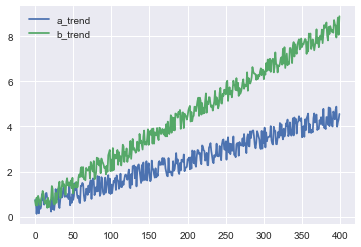

In [10]:
rand[['a_trend','b_trend']].plot()

In [11]:
rand.corr()

,a,b,a_trend,b_trend
a,1.000000,0.034136,0.259558,0.011540
b,0.034136,1.000000,0.019041,0.129143
a_trend,0.259558,0.019041,1.000000,0.961870
b_trend,0.011540,0.129143,0.961870,1.000000


correaltions huge!

difference time series

In [12]:
rand['a_trend_diff'] = rand.a_trend.diff()
rand['b_trend_diff'] = rand.b_trend.diff()

In [13]:
rand.corr()

,a,b,a_trend,b_trend,a_trend_diff,b_trend_diff
a,1.000000,0.034136,0.259558,0.011540,0.691072,0.045692
b,0.034136,1.000000,0.019041,0.129143,0.007476,0.707317
a_trend,0.259558,0.019041,1.000000,0.961870,0.177793,0.018119
b_trend,0.011540,0.129143,0.961870,1.000000,0.004105,0.090745
a_trend_diff,0.691072,0.007476,0.177793,0.004105,1.000000,0.038618
b_trend_diff,0.045692,0.707317,0.018119,0.090745,0.038618,1.000000


correlations back to reasonable level

a time series model would presumably attempt to model the trend and then use residuals...so...

In [20]:
rand['a_trend_resid'] = rand.a_trend - rand.index/100
rand['b_trend_resid'] = rand.b_trend - rand.index/50

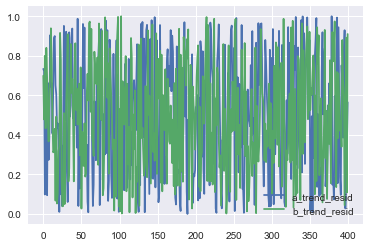

In [21]:
rand[['a_trend_resid','b_trend_resid']].plot()

In [22]:
rand[['a_trend_resid','b_trend_resid']].corr()

,a_trend_resid,b_trend_resid
a_trend_resid,1.000000,0.034136
b_trend_resid,0.034136,1.000000


same corr as before!

what do auto-corr & cross-corr look like? - same as what we are seeing in the dtoc data!!

In [33]:
rand.dropna(inplace=True)

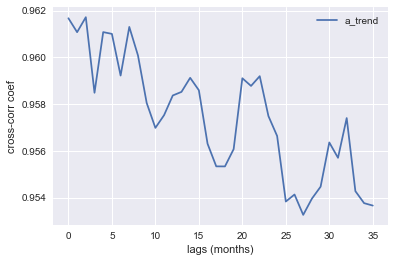

In [34]:
compute_crosscorr_mult_inputs(rand,'b_trend',['a_trend'],36)

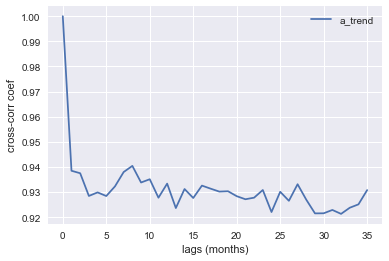

In [36]:
compute_crosscorr_mult_inputs(rand,'a_trend',['a_trend'],36)

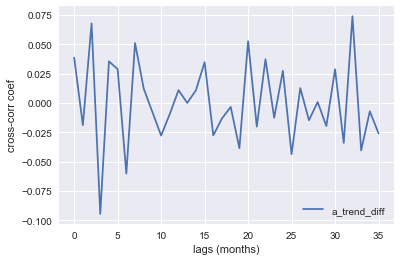

In [35]:
compute_crosscorr_mult_inputs(rand,'b_trend_diff',['a_trend_diff'],36)